<a href="https://colab.research.google.com/github/hchacon4/test/blob/main/Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install /content/drive/MyDrive/'Colab Notebooks'/'Water Distribution Network'/Simulators/network-simulator/

Processing ./drive/MyDrive/Colab Notebooks/Water Distribution Network/Simulators/network-simulator
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for network-simulator: filename=network_simulator-0.0.5-py3-none-any.whl size=5671 sha256=43733ee636fa318ff3d2271b0ee883497735d4f031883ed185abf85fa43a9b64
  Stored in directory: /root/.cache/pip/wheels/54/3d/11/50b3bdca49fbf448c30adef2595050d18a0a14e65211650115
Successfully built network-simulator
  Attempting uninstall: network-simulator
    Found existing installation: network-simulator 0.0.5
    Uninstalling network-simulator-0.0.5:
      Successfully uninstalled network-simulator-

In [ ]:
%matplotlib inline
    
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import torch

from network_simulator import WaterNetworkSimulator

from pathlib import Path

import networkx

In [ ]:
inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Simulators/network-simulator/networks/bwcn8-168-true.inp'

# # Create instance of WNS
wn_sim = WaterNetworkSimulator(inp_file)

# # Get the network in a NetworkX format
graph = wn_sim.wn.get_graph()
print(graph)
print(graph.graph)
print(graph.nodes['J10'])   # unused variable (as far as I can tell)
print(graph.nodes.keys())
print(len(graph))   # reports the numbr of nodes/
print(graph['J10'])
print(graph.edges['J10','J435', 'P295'])   # All three subscript args must be provided.

print("Hi!", graph.subgraph(['J1','J10']))   # Returns a subgraph containing the listed nodes.

MultiDiGraph with 396 nodes and 444 edges
{}
{'pos': (-247926.36, 148178.68), 'type': 'Junction'}
KeysView(NodeView(('J511', 'J411', 'J414', 'J415', 'J416', 'J417', 'J418', 'J419', 'J310', 'J311', 'J312', 'J313', 'J314', 'J315', 'J316', 'J318', 'J319', 'J210', 'J211', 'J212', 'J214', 'J217', 'J218', 'J219', 'J110', 'J420', 'J421', 'J422', 'J1153', 'J1154', 'J1155', 'J425', 'J426', 'J1157', 'J427', 'J1158', 'J428', 'J429', 'J320', 'J321', 'J322', 'J324', 'J1056', 'J327', 'J1058', 'J328', 'J329', 'J220', 'J221', 'J225', 'J226', 'J50', 'J51', 'J53', 'J54', 'J128', 'J55', 'J129', 'J56', 'J57', 'J58', 'J59', 'J1160', 'J1161', 'J431', 'J432', 'J433', 'J434', 'J435', 'J436', 'J438', 'J1169', 'J439', 'J330', 'J331', 'J332', 'J333', 'J334', 'J335', 'J336', 'J337', 'J231', 'J232', 'J233', 'J234', 'J236', 'J237', 'J130', 'J131', 'J132', 'J133', 'J60', 'J134', 'J135', 'J62', 'J64', 'J65', 'J66', 'J67', 'J68', 'J69', 'J1170', 'J441', 'J444', 'J341', 'J344', 'J345', 'J347', 'J348', 'J349', 'J241', '

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Simulators/network-simulator/networks/bwcn8-168-true.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


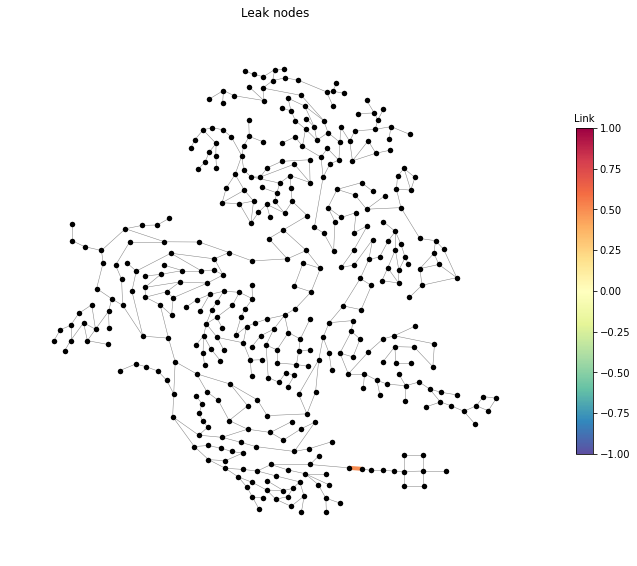

In [ ]:
# Basic plots
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# wn_sim.plot(ax, 'P8', 'P800')
# pipe = 'P235'  # touching P10
pipe = 'P100'
# pipe = 'PU1'   won't show pumps
wn_sim.plot(ax, pipe, pipe)
ax.set_aspect('equal')
# 10 leak pipes SimData
# ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024']

In [ ]:
# Distance between 2 pipes
print('Distance between pipes:', wn_sim.distance('P100', 'P1016'))

Distance between pipes: 33


/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


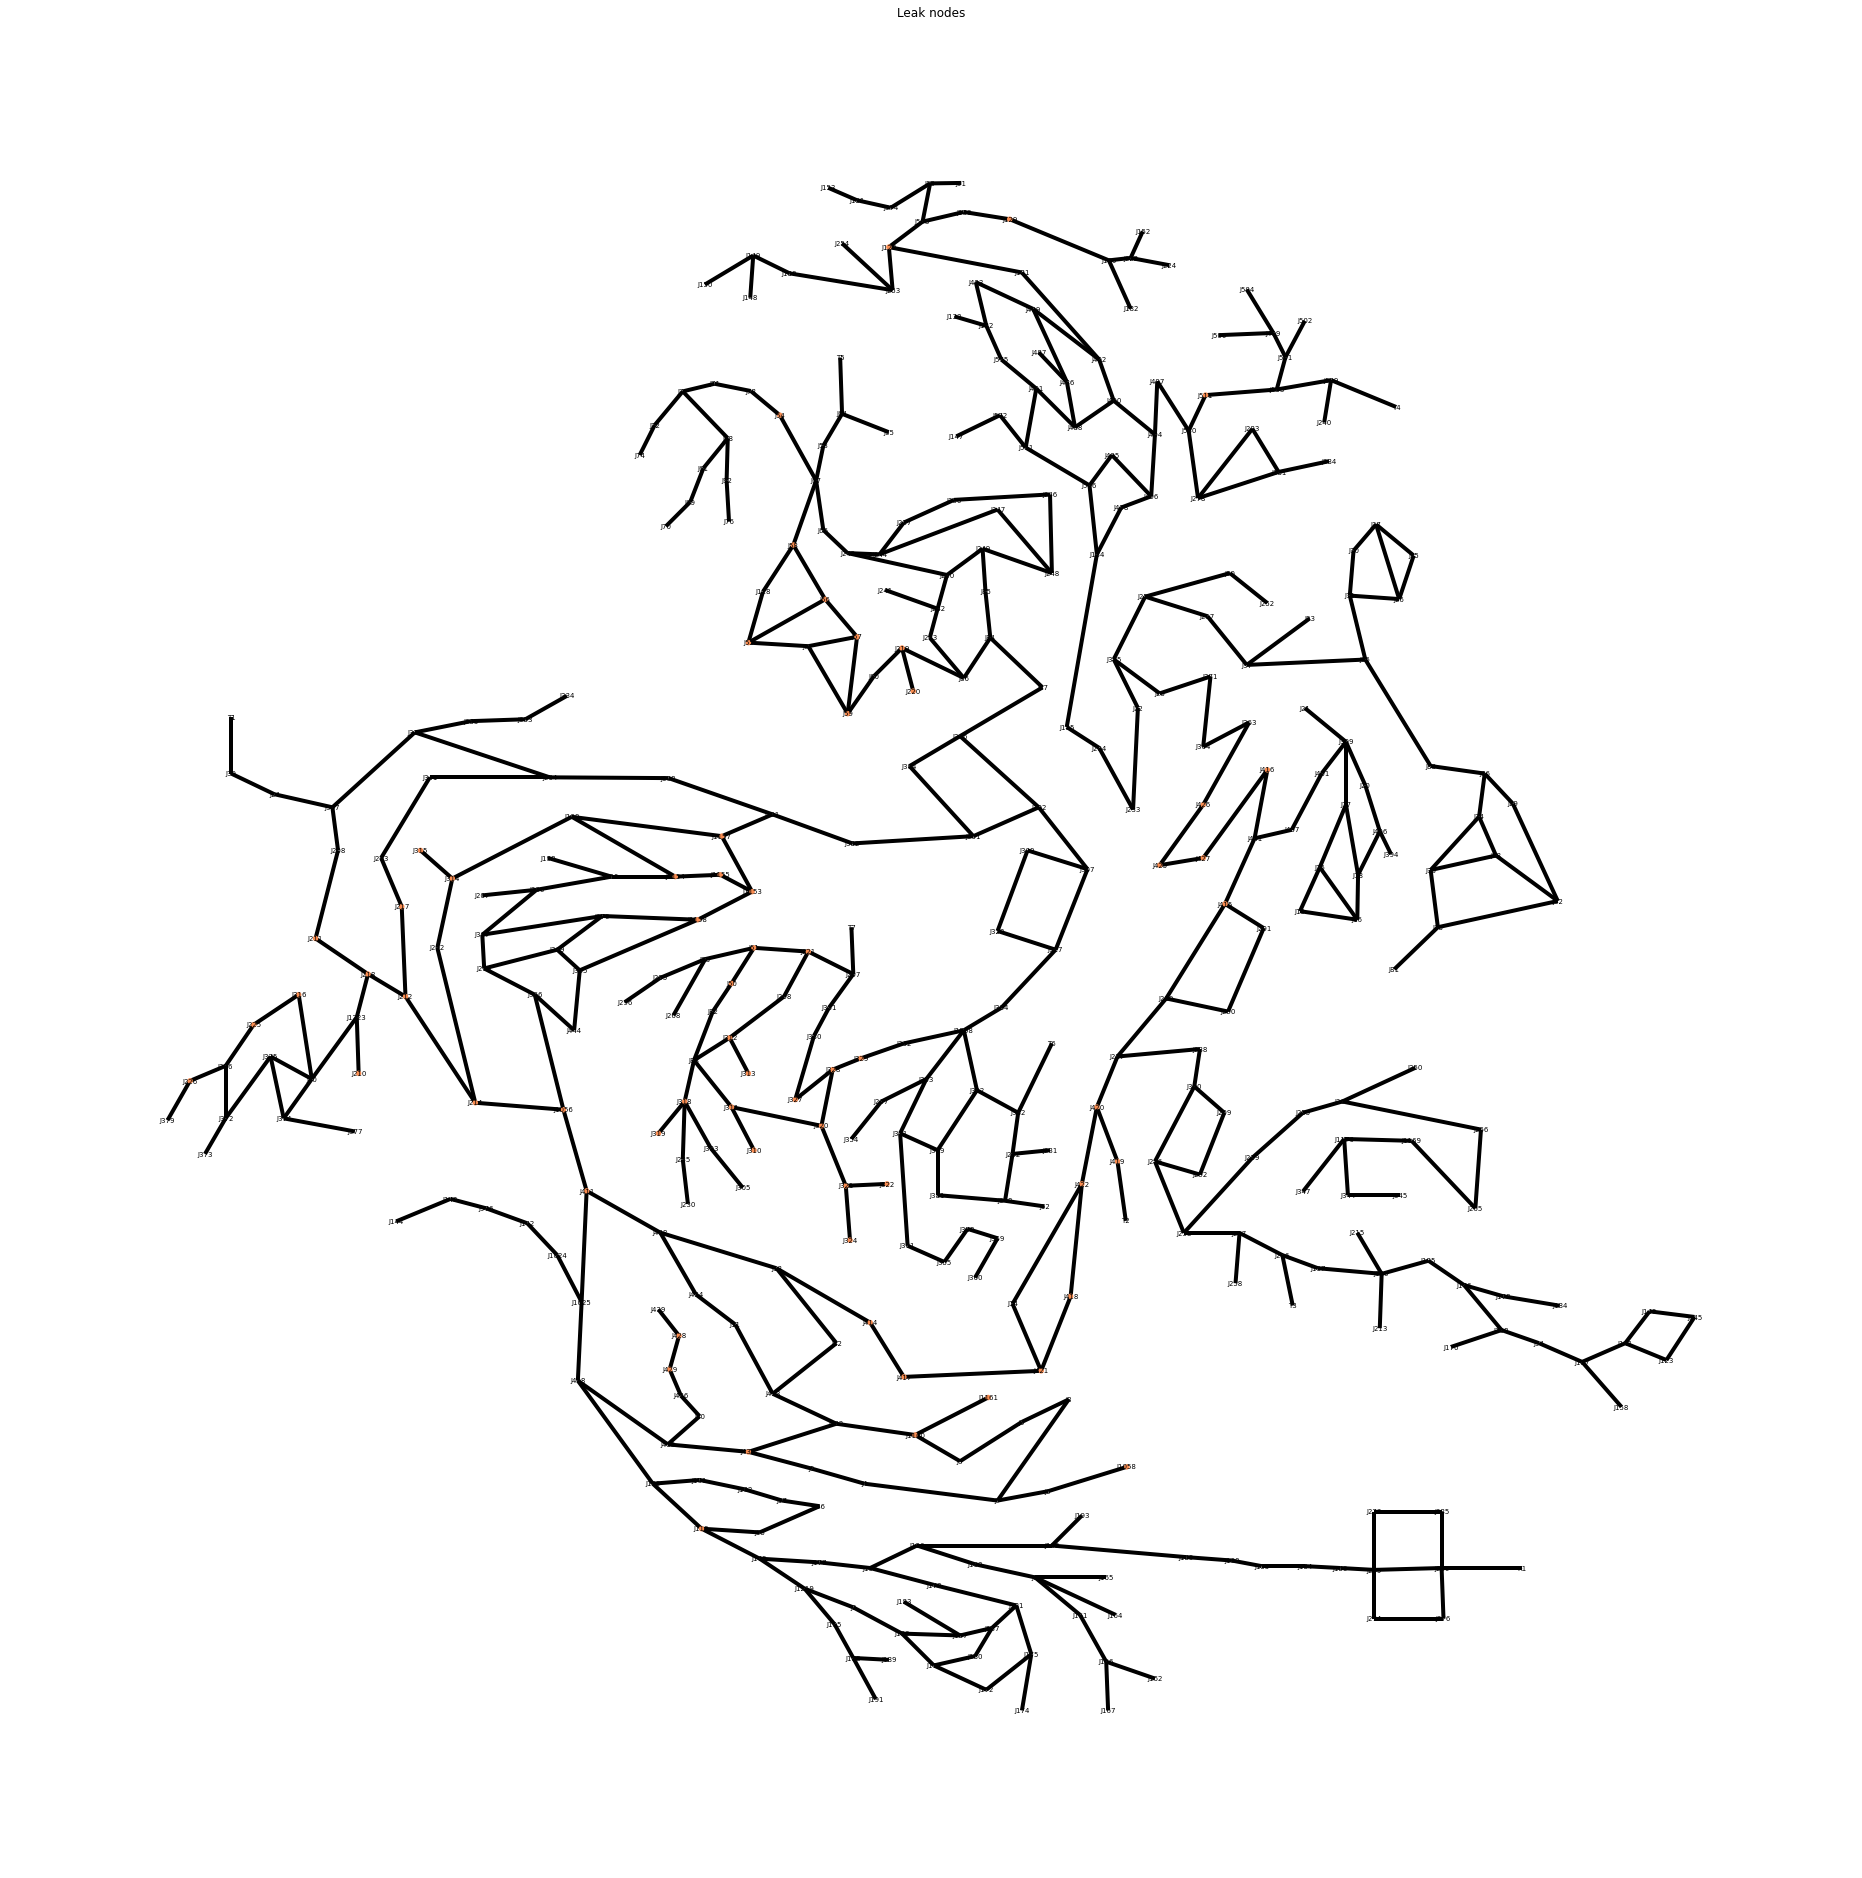

In [ ]:
import wntr

inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp'
# Create instance of WNS
wn_sim = WaterNetworkSimulator(inp_file)

# fig, ax = plt.subplots(1, 1, figsize=(12, 12))
fig, ax = plt.subplots(1, 1, figsize=(34, 34))
ax.set_aspect('equal')

link_attribute = {}
# valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P1022', 'P1023', 'P1024']
# valid_pipes = ['P10', 'P100', 'P1000', 'P1016',]
valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024',   # 10 pipes
               'P39', 'P11', 'P800', 'P810', 'P446', 'P320', 'P981', 'P967', 'P942', 'P958',   # 20 pipes
               'P124', 'P397', 'P424', 'P292', 'P670', 'P51', 'P767', 'P120', 'P1042', 'P154',   # 30 pipes
               'P14', 'P443', 'P823', 'P330', 'P268', 'P111', 'P141', 'P380', 'P163', 'P1045',   # 40 pipes
               'P1033', 'P134', 'P220', 'P402', 'P924', 'P294', 'P787', 'P795', 'P142', 'P852',   # 50 pipes
               ]   
# valid_pipes = ['P1']
# assign values to pipes
for pipe in valid_pipes:
  link_attribute[pipe] = 0.75
# print(link_attribute)
# if leak_pipe == detected_pipe:
#     link_attribute = {
#         leak_pipe: 0.5
#     }
# else:
#     link_attribute = {
#         leak_pipe: 1,
#         detected_pipe: -1
#     }
node_attribute = {}
# part_juncs = ['J1', 'J10', 'J100', 'J1000', 'J101', 'J1016', 'J102', 'J20', 'J40', 'J1024',   # 10 JiJes
#                'J39', 'J11', 'J800', 'J810', 'J446', 'J320', 'J981', 'J967', 'J942', 'J958',   # 20 JiJes
#                'J124', 'J397', 'J424', 'J292', 'J670', 'J51', 'J767', 'J120', 'J1042', 'J154',   # 30 JiJes
#                'J14', 'J443', 'J823', 'J330', 'J268', 'J111', 'J141', 'J380', 'J163', 'J1045',   # 40 JiJes
#                'J1033', 'J134', 'J220', 'J402', 'J924', 'J294', 'J787', 'J795', 'J142', 'J852',   # 50 pipes
#                 ]
part_juncs = ['J511', 'J411', 'J414', 'J415', 'J416', 'J417', 'J418', 'J419', 'J310', 'J311',   # 10 juncs
               'J312', 'J313', 'J314', 'J315', 'J316', 'J318', 'J319', 'J210', 'J211', 'J212',   # 20 juncs
               'J214', 'J217', 'J218', 'J219', 'J110', 'J420', 'J421', 'J422', 'J1153', 'J1154',   # 30 juncs
               'J1155', 'J425', 'J426', 'J1157', 'J427', 'J1158', 'J428', 'J429', 'J320', 'J321',   # 40 juncs
               'J322', 'J324', 'J1056', 'J327', 'J1058', 'J328', 'J329', 'J220', 'J221', 'J225',   # 50 juncs
               'J226', 'J50', 'J51',  'J54', 'J128', 'J55', 'J129', 'J56', 'J57', 'J58',   # 60 juncs
               'J59', 'J1160', 'J1161', 'J431',
               ]
for junc in part_juncs :
  node_attribute[junc] = 0.75

# plot using wntr
wntr.graphics.plot_network(
    wn_sim.wn, 
    ax=ax, 
    # link_attribute=link_attribute,
    node_attribute=node_attribute,
    node_size=30, 
    link_width=4,
    link_range=[-1, 1],
    node_range=[0, 1],
    title='Leak nodes',
    add_colorbar=False,
    # link_labels=True,   # comment out
    node_labels=True,
    # directed=True,   # comment out
)

# plot interactive leaflet
# wntr.graphics.network.plot_leaflet_network(
#     wn_sim.wn,
#     node_attribute_name='node_head'
#     # link_attribute=link_attribute, 
#     # node_size=30, 
#     # link_width=4,
#     # link_range=[-1, 1],
#     # title='Leak nodes',
#     # add_colorbar=False
#     # link_labels=True,   # comment out
#     # directed=True,   # comment out
# )
ax.set_aspect('equal')

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


nodes 396
edges 444
mask_params: torch.Size([840])


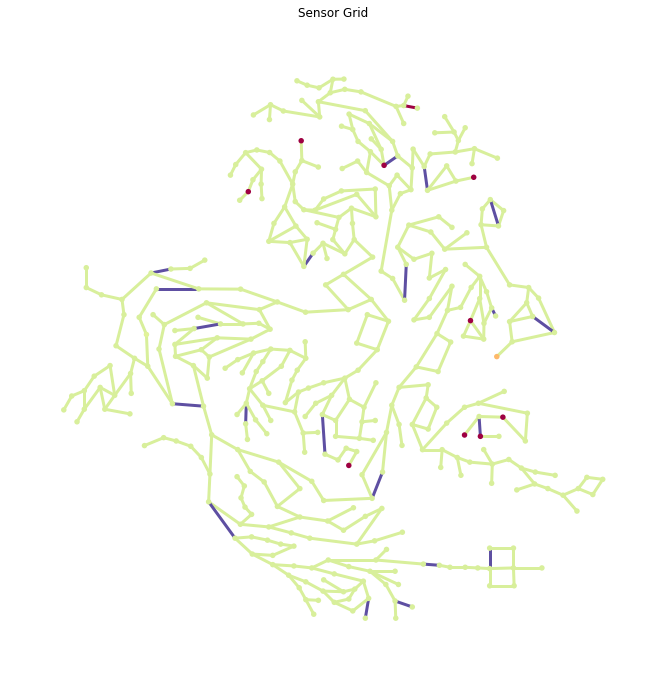

In [ ]:
import wntr

inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp'
mod_path = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Decoder/saved_models/'
# mod_file = mod_path + 'midTrainingModel.pt'
mod_file = mod_path + 'testing_display_of_sensor_grid.pt'

# Create instance of WNS
wn_sim = WaterNetworkSimulator(inp_file)
graph = wn_sim.wn.get_graph()
nodes = graph.nodes.keys()
print(f'nodes {len(nodes)}')
edges = graph.edges.keys()
print(f'edges {len(edges)}')

# Extract params
mod = torch.nn.Module()
loaded = torch.load(mod_file, map_location=torch.device('cpu'))
# mask_params = next(iter(loaded))
# print(mask_params)
mask_params = next(iter(loaded.values()))
# print(mask_params)
print('mask_params:', mask_params.size())
# prob_map = torch.sigmoid(mask_params)
sparse_probMap = torch.sigmoid(mask_params)
# # print(prob_map)
# print('prob_map:', prob_map.size())
# sparsity = 0.02
# mean = torch.mean(prob_map, dim=0, keepdim=True)
# print(f'mean {mean}')
# scalar = sparsity / mean
# beta_scalar = (1 - sparsity) / (1 - mean)
# toggle = torch.le(scalar, 1).float()
# sparse_probMap = ( toggle * scalar * prob_map
#                     + (1 - toggle) * (1 - (1 - prob_map) * beta_scalar) )
# print(sparse_probMap)
# assert False

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# fig, ax = plt.subplots(1, 1, figsize=(34, 34))
ax.set_aspect('equal')

# valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P1022', 'P1023', 'P1024']   # original set
# valid_pipes = ['P10', 'P100', 'P1000', 'P1016',]
# valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024',]
valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024',   # 10 pipes
               'P39', 'P11', 'P800', 'P810', 'P446', 'P320', 'P981', 'P967', 'P942', 'P958',   # 20 pipes
              #  'P124', 'P397', 'P424', 'P292', 'P670', 'P51', 'P767', 'P120', 'P1042', 'P154',   # 30 pipes
              #  'P14', 'P443', 'P823', 'P330', 'P268', 'P111', 'P141', 'P380', 'P163', 'P1045',   # 40 pipes
              #  'P1033', 'P134', 'P220', 'P402', 'P924', 'P294', 'P787', 'P795', 'P142', 'P852',   # 50 pipes
               ]
# valid_pipes = ['P1']

link_attribute = {}
node_attribute = {}
i = 0
for edge in edges :
  # link_attribute[edge[2]] = prob_map[i].item()
  link_attribute[edge[2]] = sparse_probMap[i].item()
  # print(i, edge)
  i += 1
for node in nodes :
  # node_attribute[node] = prob_map[i].item()
  node_attribute[node] = sparse_probMap[i].item()
  # print(i, node)
  i += 1
# print(node_attribute)

# node_attribute['J10'] = 0.75
# for i, node in enumerate(nodes) :
#     node_attribute[node] = prob_map[i].item()
# print(node_attribute)

# Highlight leak-pipe set
for pipe in valid_pipes:
  link_attribute[pipe] = -0.75
# print(link_attribute)
# if leak_pipe == detected_pipe:
#     link_attribute = {
#         leak_pipe: 0.5
#     }
# else:
#     link_attribute = {
#         leak_pipe: 1,
#         detected_pipe: -1
#     }

# plot using wntr
wntr.graphics.plot_network(
    wn_sim.wn, 
    ax=ax, 
    link_attribute=link_attribute,
    node_attribute=node_attribute,
    node_size=30, 
    link_width=3,
    link_range=[-0.6, 1],
    node_range=[-0.6, 1],
    title='Sensor Grid',
    add_colorbar=False,
    # link_labels=True,   # comment out
    # node_labels=True,
    # directed=True,   # comment out
)

# plot interactive leaflet
# wntr.graphics.network.plot_leaflet_network(
#     wn_sim.wn,
#     node_attribute_name='node_head'
#     # link_attribute=link_attribute, 
#     # node_size=30, 
#     # link_width=4,
#     # link_range=[-1, 1],
#     # title='Leak nodes',
#     # add_colorbar=False
#     # link_labels=True,   # comment out
#     # directed=True,   # comment out
# )
ax.set_aspect('equal')
# assert False

####Scratch work

In [ ]:
# #from network_simulator import wntr
# import wntr

# # class Graph_Network():
# #   def __init__(self, inp_file):
# #   # Create instance of WNS
# #   self.wn_sim = wntr.network.WaterNetworkModel(inp_file)
# #   sim = wntr.sim.EpanetSimulator(self.wn_sim)
# #   self.results = sim.run_sim()

# def graph_timestamp(inp_file, net_char, hour):
#   # Create instance of WNS
#   wn_sim = wntr.network.WaterNetworkModel(inp_file)
#   sim = wntr.sim.EpanetSimulator(wn_sim)
#   results = sim.run_sim()

#   node_keys = results.node.keys()
#   #print(node_keys)
#   link_keys = results.link.keys()
#   # print(link_keys)

#   node = False
#   if net_char > 2:
#     node = True
#   # alt: [output if condition else output for l in list]

#   if net_char == 0:
#     charact_str = 'flowrate'
#   elif net_char == 1:
#     charact_str = 'headloss'
#   elif net_char == 2:
#     charact_str = 'velocity'
#   elif net_char == 3:
#     charact_str = 'demand'
#   elif net_char == 4:
#     charact_str = 'head'
#   elif net_char == 5:
#     charact_str = 'pressure'

#   if node:
#     charact = results.node[charact_str]
#   else:
#     charact = results.link[charact_str]
#     # flowrate = results.link['flowrate']
#     # flowrate_at_tmstp = flowrate.loc[3600*80,:]
#     # print(flowrate_at_timestamp)
#     # colorbar_str = 'link_colorbar_label'

#   char_at_tmstp = charact.loc[3600*hour,:]

#   fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#   # medium gray
#   # '#7d7e7c'
#   fig.set_facecolor('#7d7f7c')
#   # ax.set_facecolor('xkcd:salmon')
#   # ax.set_facecolor((1.0, 0.47, 0.42))

#   if node:
#     ax = wntr.graphics.plot_network(wn_sim,
#                                     node_attribute=char_at_tmstp,
#                                     node_range=[30,55],
#                                     node_colorbar_label=charact_str+'(m^3/hr)',
#                                     ax=ax,)
#   else:
#     ax = wntr.graphics.plot_network(wn_sim,
#                                     link_attribute=char_at_tmstp,
#                                     link_width=3,
#                                     link_range=[-0.2,0.2],
#                                     link_colorbar_label=charact_str+'(m^3/hr)',
#                                     ax=ax,)

# inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/000000/sim.inp'
# label = 'P1'   # for 000000 scenario
# net_char = 0
# hour = 80
# graph_timestamp(inp_file, net_char, hour)

In [ ]:
# inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp'
# # inp_file = '/content/temp_test/000001/sim.inp'
# net_char = 0
# hour = 80
# graph_timestamp(inp_file, net_char, hour)
# plt.close()

#from network_simulator import wntr
# import wntr

# # Create instance of WNS
# wn_sim = wntr.network.WaterNetworkModel(inp_file)
# sim = wntr.sim.EpanetSimulator(wn_sim)
# results = sim.run_sim()

# node_keys = results.node.keys()
# print(node_keys)

# link_keys = results.link.keys()
# print(link_keys)

# # Get the network in a NetworkX format
# #graph = wn_sim.wn.get_graph()
# #graph

# # flowrate = results.node['head']
# flowrate = results.link['flowrate']
# # print(flowrate)
# flowrate_at_tmstp = flowrate.loc[3600*80,:]
# # print(flowrate_at_timestamp)

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # ax = wntr.graphics.plot_network(wn_sim, node_attribute=head_at_tmstp,
#                                 # node_range=[30,55], node_colorbar_label='Demand ()', ax=ax)
# ax = wntr.graphics.plot_network(wn_sim, link_attribute=flowrate_at_tmstp,
#                                 node_range=[10,55], link_colorbar_label='Flow Rate (##)', ax=ax)

####Network Graph Class
- display network attributes on network graph

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/_base_/sim.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000005/info.json
label(): 
 P20
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000006/info.json
label(): 
 P1000
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000007/info.json
label(): 
 P102
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000008/info.json
label(): 
 P20
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000009/info.json
label(): 
 P1024
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000010/info.json
label(): 
 P1016
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFix

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/_base_/sim.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000005/info.json
label(): 
 P40
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000006/info.json
label(): 
 P1016
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000007/info.json
label(): 
 P10
load_data(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000007/data.h5
load_data(): 
 /link_flowrate
graph_diff(): norm_diff_flowrate
plot_figure(): min -0.3025418817996979 max 0.2883530259132385
Displaying results: min -0.3025418817996979 max 0.2883530259132385
row 1 col 1
--- End dataset ---


label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000005/info.json
label(): 
 P40
label(): 
 /content/drive/MyDrive/Colab Noteb

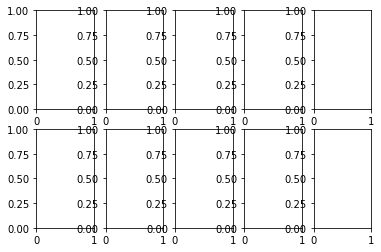

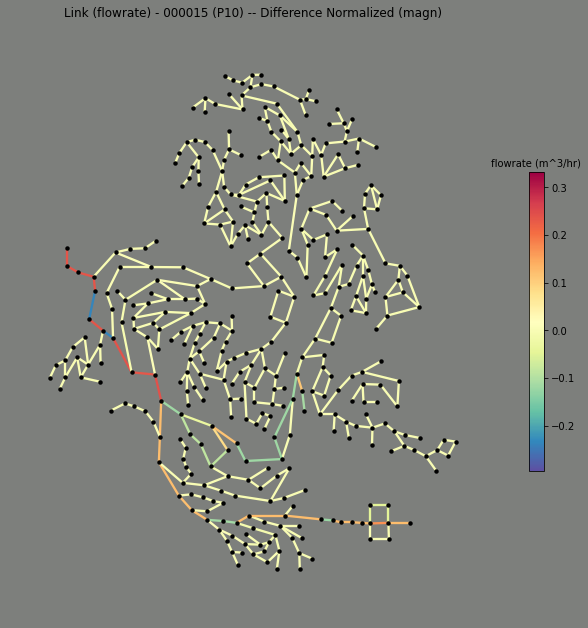

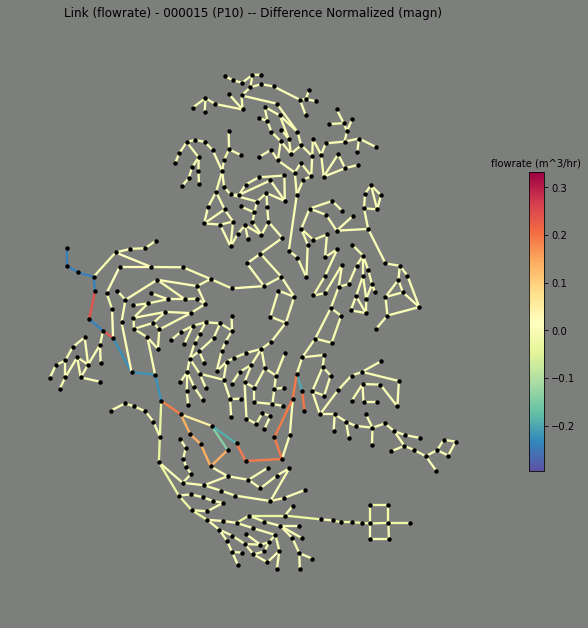

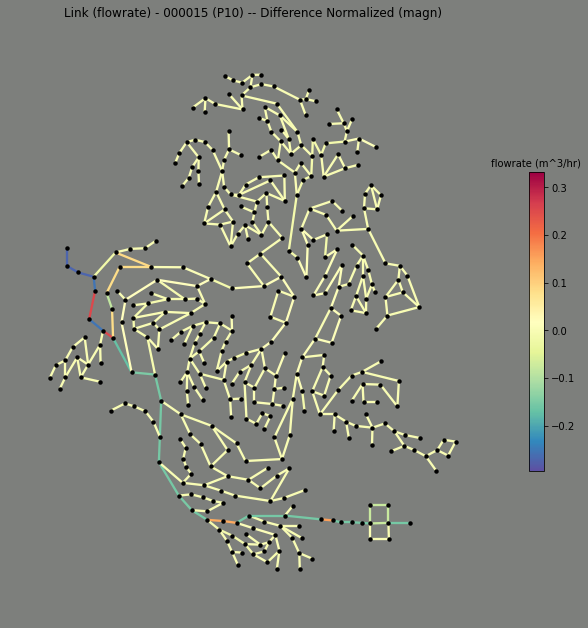

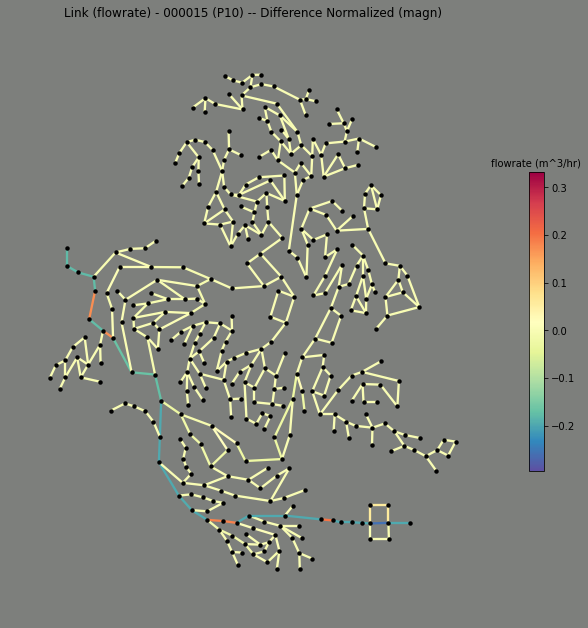

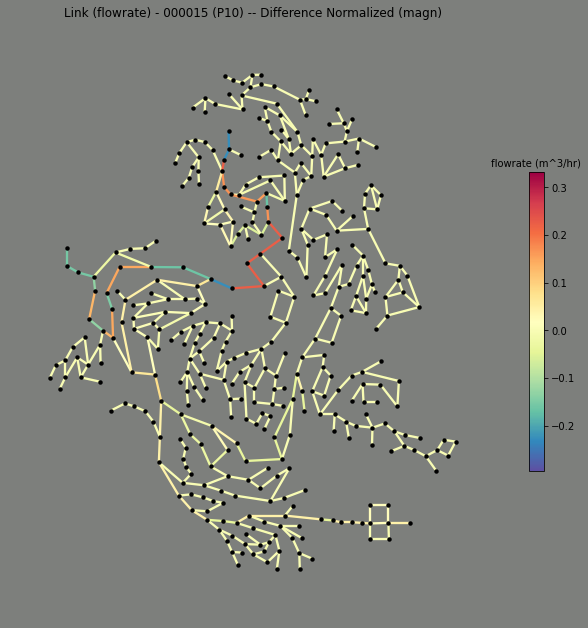

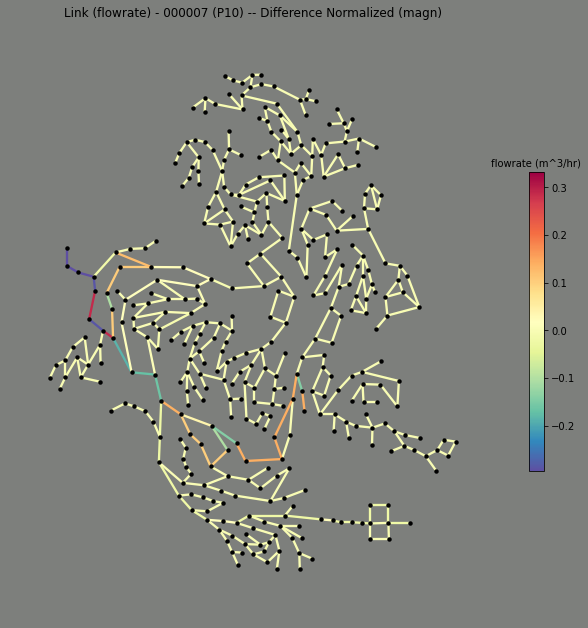

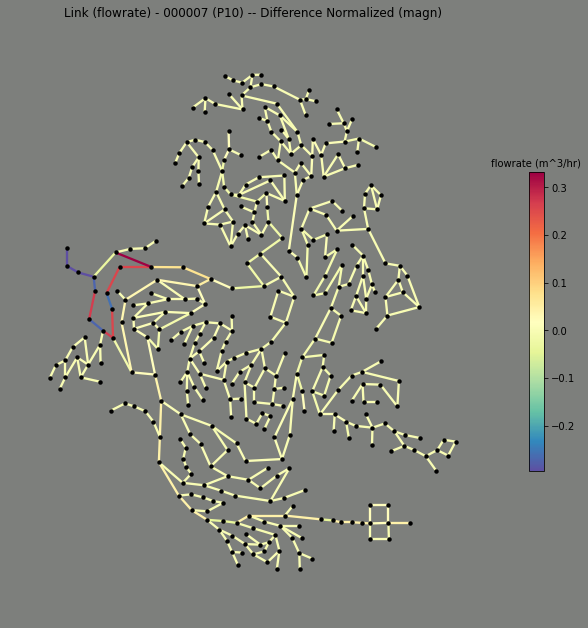

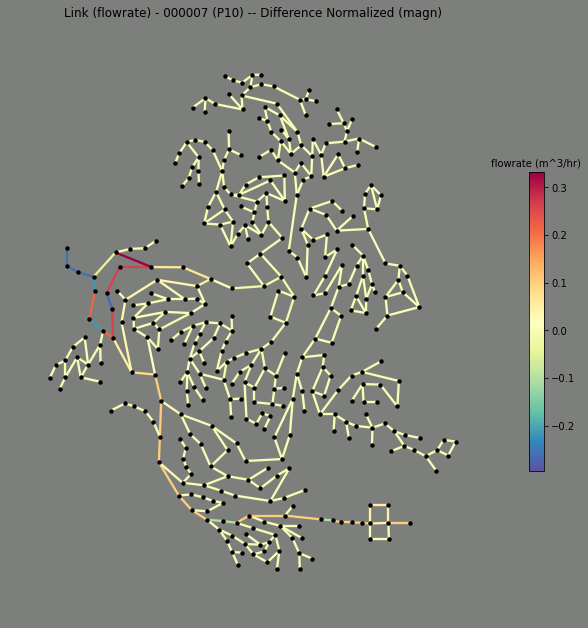

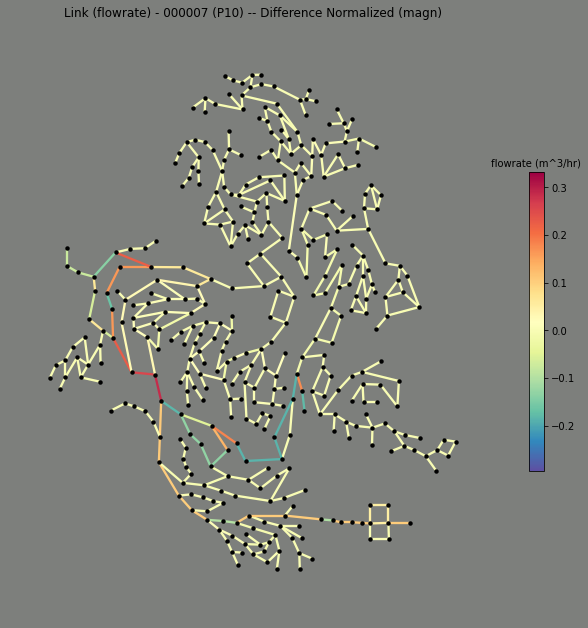

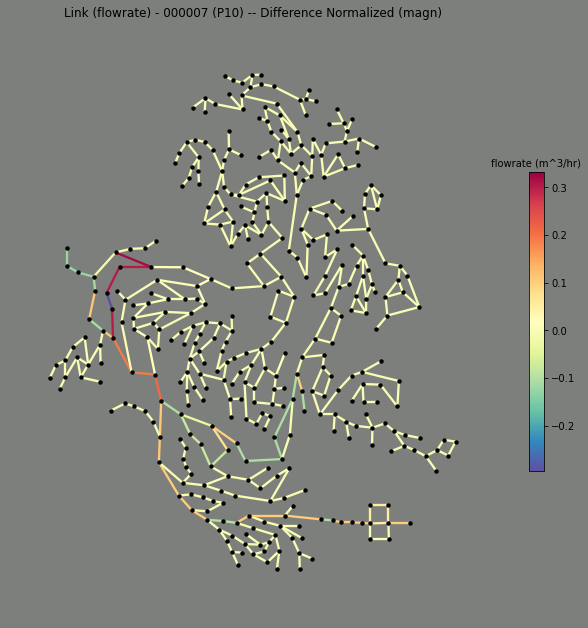

In [ ]:
#from network_simulator import wntr
import wntr

class Network_Graph():
  """Center this class on leak scenario; save base case file as member"""

  def __init__(self, data_dir, scen_num, inp_file=None):
    # Load base automatically for comparison to corresponding leak scenarios
    # Create instance of WNS
    self.data_dir = data_dir
    self.scen_num = scen_num
    self.inp_file = data_dir + '_base_/sim.inp'
    self.wn_sim = wntr.network.WaterNetworkModel(self.inp_file)
    sim = wntr.sim.EpanetSimulator(self.wn_sim)   # intensionally not a member
    self.base_results = sim.run_sim()   # why run the sim? why not load the base data?
    # Range: [node_lo, node_hi, link_lo, link_hi]
    self.range = self.range_dict()   # [-1.20, 1.20, -0.0015, 0.0015]
    self.label = self.label()
    self.leak_file = self.data_dir + self.scen_num + '/data.h5'
  
  def range_dict(self) :
    return {'flowrate' : [],
            'headloss' : [],
            'velocity' : [],
            'demand' : [],
            'head' : [30, 170],
            'pressure' : [],
            'norm_flowrate' : [-0.0015, 0.0015],
            'norm_headloss' : [],
            'norm_velocity' : [],
            'norm_demand' : [],
            'norm_head' : [0.02, 0.08],
            'norm_pressure' : [],
            'max_flowrate' : [-0.0015, 0.0015],
            'max_headloss' : [],
            'max_velocity' : [],
            'max_demand' : [],
            'max_head' : [0.4, 1.00],
            'max_pressure' : [],           
            'diff_flowrate' : [-0.0015, 0.0015],
            'diff_headloss' : [],
            'diff_velocity' : [],
            'diff_demand' : [],
            'diff_head' : [-1.20, 1.20],
            'diff_pressure' : [],
            'norm_diff_flowrate' : [-0.29582, 0.33138],
            'norm_diff_headloss' : [],
            'norm_diff_velocity' : [],
            'norm_diff_demand' : [],
            # 'norm_diff_head' : [-0.01309, 0.11263],  #0.08 -> 0.1
            # 'norm_diff_head' : [-0.26436, 0.00742], # 0.01 -> 0.07
            'norm_diff_head' : [-0.26436, 0.11263],  #0.01 -> 0.1
            'norm_diff_pressure' : [],
            'max_diff_flowrate' : [-0.0015, 0.0015],
            'max_diff_headloss' : [],
            'max_diff_velocity' : [],
            'max_diff_demand' : [],
            'max_diff_head' : [-0.40, 1.20],
            'max_diff_pressure' : [],}

  def label(self):
    j_file = self.data_dir + self.scen_num + '/info.json'
    print('label(): \n', j_file)
    j_data = pd.read_json(j_file)
    label = j_data['leak_pipes'][0]
    print('label(): \n', label)
    return label

  def graph_timestamp(self, net_char, hour):
    """Graph scenario hour time stamp"""
    # data = self.load_data(net_char)
    # # print(data)
    # char_at_tmstp = data.loc[3600*hour,:]
    char_at_tmstp = self.time_stamp(net_char, hour)
    self.plot_figure(net_char, char_at_tmstp)

  def graph_base_timestamp(self, net_char, hour):
    """Display base case"""
    node, _, __ = self.node_or_link(net_char)
    append_title = ' - base'
    charac_str, units = self.char_str(net_char)

    if node:
      char_meas = self.base_results.node[charac_str]
    else:
      char_meas = self.base_results.link[charac_str]
      # flowrate = results.link['flowrate']
      # flowrate_at_tmstp = flowrate.loc[3600*80,:]
      # print(flowrate_at_timestamp)
      # colorbar_str = 'link_colorbar_label'

    char_at_tmstp = char_meas.loc[3600*hour,:]   # Panda Series
    self.plot_figure(net_char, char_at_tmstp, append_title)

  def graph_diff(self, net_char, hour) :
    """Display difference of observed and expected"""
    char_at_tmstp = self.difference(net_char, hour)
    append_title = ' -- Difference'
    range_str = 'diff_' + self.char_str(net_char)[0]
    # print('graph_diff():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
  
  def graph_norm(self, net_char, hour) :   
    char_at_tmstp = self.normalize(net_char, hour)
    append_title = ' -- Normalized (magn)'
    range_str = 'norm_' + self.char_str(net_char)[0]
    print('graph_norm():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)

  def graph_max(self, net_char, hour) :   
    char_at_tmstp = self.norm_max(net_char, hour)
    append_title = ' -- Normalized (max)'
    range_str = 'max_' + self.char_str(net_char)[0]
    print('graph_max():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)

  def graph_norm_diff(self, net_char, hour) :   
    char_at_tmstp = self.norm_diff(net_char, hour)
    append_title = ' -- Difference Normalized (magn)'
    range_str = 'norm_diff_' + self.char_str(net_char)[0]
    print('graph_diff():', range_str)
    # self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
    # return char_at_tmstp.min(), char_at_tmstp.max()
    ax = self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
    return char_at_tmstp.min(), char_at_tmstp.max(), ax
  
  def graph_max_diff(self, net_char, hour) :
    char_at_tmstp = self.max_diff(net_char, hour)
    append_title = ' -- Difference Normalized (max)'
    range_str = 'max_diff_' + self.char_str(net_char)[0]
    print('graph_diff():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
  
  def time_stamp(self, net_char, hour) :
    data = self.load_data(net_char)
    # print(data)
    return data.loc[3600*hour,:]    

  def difference(self, net_char, hour):
    data = self.load_data(net_char)

    node, title, norlkeys = self.node_or_link(net_char)
    charac_str, units = self.char_str(net_char)

    # Might be more efficient to first extract the tmstp, then take the difference
    if node:
      char_meas = data.values - self.base_results.node[charac_str]
    else:
      char_meas = data.values - self.base_results.link[charac_str]

    return char_meas.loc[3600*hour,:]
    # print("diff():", type(char_at_tmstp.values))   # numpy ndarray
  
  def normalize(self, net_char, hour) :
    char_at_tmstp = self.time_stamp(net_char, hour)
    return self.div_by_magn(char_at_tmstp)

  def norm_max(self, net_char, hour) :
    char_at_tmstp = self.time_stamp(net_char, hour)
    return self.div_by_max(char_at_tmstp)

  def norm_diff(self, net_char, hour) :
    char_at_tmstp = self.difference(net_char, hour)
    return self.div_by_magn(char_at_tmstp)

  def max_diff(self, net_char, hour) :
    char_at_tmstp = self.difference(net_char, hour)
    return self.div_by_max(char_at_tmstp)

  def load_data(self, net_char) :
    net_char += 3
    leak_file = self.leak_file
    # Create dictionary of hdf file data keys
    charac_dict = self.characteristic_dict(leak_file)
    # print('load_data()', charac_dict)
    # Load leak data
    data = pd.read_hdf(leak_file, charac_dict[net_char])   # hdf using less memory; set sim file_format='hdf'
                                                           # hdf -> Hierarchical Data Format; storage and manipulation
                                                           #  of scientific data across diverse operating systems and machines
    print('load_data(): \n', leak_file)
    print('load_data(): \n', charac_dict[net_char])
    return data
  
  def node_or_link(self, net_char):
    if net_char > 2:
      node = True
      title = 'Node'
      nd_or_lk_keys = self.base_results.node.keys()
      #print(node_keys)
    else:
      node = False
      title = 'Link'
      nd_or_lk_keys = self.base_results.link.keys()
      # print(link_keys)
    # alt: [output if condition else output for l in list]
    title += ( ' (' + self.char_str(net_char)[0] + ')' +
        ' - '+self.scen_num+' ('+self.label+')' )
    return node, title, nd_or_lk_keys

  def char_str(self, net_char):
    if net_char == 0:
      charac_str = 'flowrate'
      units = '(m^3/hr)'
    elif net_char == 1:
      charac_str = 'headloss'
      units = '(m)'
    elif net_char == 2:
      charac_str = 'velocity'
      units = '(m/s)'
    elif net_char == 3:
      charac_str = 'demand'
      units = '(m^3/hr)'
    elif net_char == 4:
      charac_str = 'head'
      units = '(m)'
    elif net_char == 5:
      charac_str = 'pressure'
      units = '(m)'
    else :
      charac_str = "char_str(): Error"
      units = "char_str(): Error"
    return charac_str, units

  def characteristic_dict(self, leak_file) :
    charac_dict = {}
    with pd.HDFStore(leak_file) as hdf:
      for key, value in enumerate(hdf.keys()):
        charac_dict[key] = value
    #   print(hdf.keys())

    # output (debug=True):
    # {0: '/leak_demand', 1: '/leak_head', 2: '/leak_pressure',
    #  3: '/link_flowrate', 4: '/link_headloss', 5: '/link_velocity',
    #  6: '/node_demand', 7: '/node_head', 8: '/node_pressure'}
    # print(charac_dict)
    return charac_dict
      
  def plot_figure(self, net_char, char_at_tmstp, append_title='', range_str=None) :
    """range: [node_lo, node_hi, link_lo, link_hi]"""
    print(f'plot_figure(): min {char_at_tmstp.min()} max {char_at_tmstp.max()}' )
    charac_str, units = self.char_str(net_char)
    
    if not range_str :
      range_str = charac_str
    
    node, title, norlkeys = self.node_or_link(net_char)
    title += append_title

    fig, ax = plt.subplots(1, 1, figsize=(11, 11))
    # medium gray
    # '#7d7e7c'
    fig.set_facecolor('#7d7f7c')
    # ax.set_facecolor('xkcd:salmon')

    if node:
      ax = wntr.graphics.plot_network(self.wn_sim,
                                      node_attribute=char_at_tmstp,
                                      title=title,
                                      node_size=30,
                                      node_range=self.range[range_str],
                                      node_colorbar_label=charac_str+' '+units,
                                      ax=ax,)
    else:
      ax = wntr.graphics.plot_network(self.wn_sim,
                                      link_attribute=char_at_tmstp,
                                      title=title,
                                      link_width=2.3,
                                      link_range=self.range[range_str],
                                      link_colorbar_label=charac_str+' '+units,
                                      link_labels=False,
                                      directed=False,
                                      ax=ax,)
  
  def plot_hist(self, net_char, hour, norm='') :
    if norm == 'magn' : char_at_tmstp = self.norm_diff(net_char, hour)
    elif norm == 'max' : char_at_tmstp = self.max_diff(net_char, hour)
    else : assert False
    
    # mask_zeros = (char_at_tmstp != 0.0)
    # mask_zeros = ~((char_at_tmstp > -0.0001) & (char_at_tmstp < 0.0001))
    # print('plot_hist(): ', len(char_at_tmstp[mask_zeros]), f'of {len(char_at_tmstp)}')
    # plt.hist(char_at_tmstp[mask_zeros], bins=30)
    plt.hist(char_at_tmstp, bins=30)
    plt.show()
  
  def div_by_magn(self, tmstp_series) :
    magn = self.magn_tmstp(tmstp_series)
    # print('div_by_magn(): magn', magn)
    # print('div_by_magn(): tm / magn\n',tmstp_values / magn)
    return tmstp_series / magn

  def magn_tmstp(self, tmstp_series) :
    """tmstp_values (ndarray): """
    # Sqaure ea value
    tmstp_series = tmstp_series ** 2
    # print('tmstp_magn():', tmstp_values)
    # Sum all values
    sum_values = tmstp_series.sum()
    # print('tmstp_magn():', sum_values)
    # Return sqrt of sum
    return np.sqrt(sum_values)

  def div_by_max(self, tmstp_series) :
    # print('div_by_max():', tmstp_series.max())
    return tmstp_series / tmstp_series.max()

  def label_linkset(links):
    # label only the links listed (as opposed to all e.g. using link_labels=True)
    pass

def diffOfTwoScen() :
  pass

# data_dir = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed_hdf/'
data_dir = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_area'
# data_dirs = [data_dir + 'Fixed0.1_hdf/', data_dir +'Fixed0.06_hdf/', data_dir + '0.1_0.01_hdf/', data_dir +'Fixed0.02_hdf/', data_dir + 'Fixed0.01_hdf/']
# data_dirs = [data_dir +'Fixed0.06_hdf/', data_dir + 'Fixed0.07_hdf/', data_dir +'Fixed0.08_hdf/', data_dir + 'Fixed0.09_hdf/']
# Flow rate: 0.01 -> 0.1
data_dirs = [data_dir + 'Fixed0.1_hdf/', data_dir + 'Fixed0.09_hdf/', data_dir +'Fixed0.08_hdf/',
             data_dir + 'Fixed0.07_hdf/', data_dir +'Fixed0.06_hdf/', data_dir +'Fixed0.02_hdf/',
             data_dir + 'Fixed0.01_hdf/']
# Head: 0.8 -> 0.1
# data_dirs = [data_dir + 'Fixed0.1_hdf/', data_dir + 'Fixed0.09_hdf/', data_dir +'Fixed0.08_hdf/',]
# Head: 0.01 -> 0.7
# data_dirs = [data_dir + 'Fixed0.07_hdf/', data_dir +'Fixed0.06_hdf/', data_dir +'Fixed0.02_hdf/',
#              data_dir + 'Fixed0.01_hdf/']

def area_comparision() :
  # Compare area sizes for one timestamp
  mins = set()
  maxs = set()
  for data_dir in data_dirs :
    for i in range(0, 40):
      scen_num = '0000' + f'{i:02}'
      net_char = 0
      hour = 80
      #### Read graphics section of wntr docs ####
      # Possible strat: return axes, index fig positions
      leak_netgph = Network_Graph(data_dir, scen_num)
      # leak_netgph.graph_timestamp(net_char, hour)
      # leak_netgph.graph_base_timestamp(net_char, hour)
      if leak_netgph.label == 'P100' :
        # leak_netgph.difference(net_char, hour)
        # leak_netgph.graph_norm(net_char, hour)
        minim, maxim = leak_netgph.graph_norm_diff(net_char, hour)
        # leak_netgph.graph_max(net_char, hour)
        # leak_netgph.plot_hist(net_char, hour, norm='magn')
        mins.add(minim)
        maxs.add(maxim)
        print(f'Displaying results: min {minim} max {maxim}')
        break
    print('--- End dataset ---\n\n')
  print(f'Displaying results: min {mins}\n  max {maxs}')
  print(f'Displaying results: min {min(mins)} max {max(maxs)}, [{min(mins)}, {max(maxs)}]')

def time_series_fixedLeak() :
  # Time-series analysis (over multiple tmstps) of one leak area.
  mins = set()
  maxs = set()
  fig, axs = plt.subplots(2, 5)     # 10 axes, returned as a 2-by-5 2-d array
  # plt.figure(figsize=(4, 10))
  row, col, i = 0, 0, 1
  for idx in range(2, 4) :
    data_dir = data_dirs[idx]
    for tmstp in range(60, 110, 10) :
      # data_dir = data_dirs[2]   # 0.08
      # data_dir = data_dirs[3]   # 0.07
      for i in range(5, 40):
        scen_num = '0000' + f'{i:02}'
        net_char = 0
        hour = tmstp
        #### Read graphics section of wntr docs ####
        # Possible strat: return axes, index fig positions
        leak_netgph = Network_Graph(data_dir, scen_num)
        # leak_netgph.graph_timestamp(net_char, hour)
        # leak_netgph.graph_base_timestamp(net_char, hour)
        if leak_netgph.label == 'P10' :
          # leak_netgph.difference(net_char, hour)
          # leak_netgph.graph_norm(net_char, hour)
          minim, maxim, ax = leak_netgph.graph_norm_diff(net_char, hour)
          # leak_netgph.graph_max(net_char, hour)
          # leak_netgph.plot_hist(net_char, hour, norm='magn')
          mins.add(minim)
          maxs.add(maxim)
          print(f'Displaying results: min {minim} max {maxim}')
          # matplotlib -- build grid of network graphs
          # plt.sca(axs[row, col])   # set the current axes
          # axs[row, col] = plt
          # ax = fig.add_subplot(1, 2, 1)
          # axs[row, col] = plt.gca()
          axs[row, col] = ax
          # plt.subplot(250 + i)
          col += 1
          i += 1
          print(f'row {row} col {col}')
          break
      print('--- End dataset ---\n\n')
    row += 1
    col = 0
  print(f'Displaying results: min {mins}\n  max {maxs}')
  print(f'Displaying results: min {min(mins)} max {max(maxs)}, [{min(mins)}, {max(maxs)}]')
# area_comparision()
time_series_fixedLeak()
print('--- End all datasets ---\n\n')


In [ ]:
  ls = [1,2,3,4,5,6]
  s = {0.9, 1, 2, 2.2}
  print(f'{min(s)}')
  # ls > 0   # relational operators not defined for Python lists

0.9


In [ ]:
tn1 = torch.ones(20)
print(tn1)
tn2 = torch.ones(20) * 2
print(tn2)
tnCat = torch.cat((tn1, tn2))
print(tnCat)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.])
